In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Helper functions

In [83]:
def plot_bar(data, x_col, y_col, agg_func='sum', title=None, xlabel=None, ylabel=None):
    """
    Plots a bar chart based on the specified X and Y columns with an aggregation function.

    Parameters:
        data (pd.DataFrame): The data frame containing the data.
        x_col (str): The column to use for the X-axis (categorical variable).
        y_col (str): The column to aggregate and use for the Y-axis (numerical variable).
        agg_func (str): The aggregation function to apply ('mean', 'sum', 'count', etc.).
        title (str): The title of the plot (optional).
        xlabel (str): Label for the X-axis (optional).
        ylabel (str): Label for the Y-axis (optional).

    Returns:
        None: Displays the bar plot.
    """
    # Perform aggregation
    aggregated_data = data.groupby(x_col)[y_col].agg(agg_func).reset_index()

    # Plot the bar chart
    plt.figure(figsize=(5, 3))
    plt.bar(aggregated_data[x_col], aggregated_data[y_col], color='skyblue')
    plt.title(title if title else f'{agg_func.capitalize()} of {y_col} by {x_col}')
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else f'{agg_func.capitalize()} {y_col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [80]:
def add_time_features(data, date_col='date'):
    df = data.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col).reset_index(drop=True)

    # Time-based features
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Day'] = df[date_col].dt.day


    return df

In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [78]:
df_train.tail()

,id,date,country,store,product,num_sold
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [81]:
df_train = add_time_features(df_train)
df_train.head()

,id,date,country,store,product,num_sold,Year,Month,Day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,579.0,2010,1,1
2,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,911.0,2010,1,1
3,63,2010-01-01,Norway,Discount Stickers,Kerneler,791.0,2010,1,1
4,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1525.0,2010,1,1


In [4]:
df_train.id.nunique()

230130

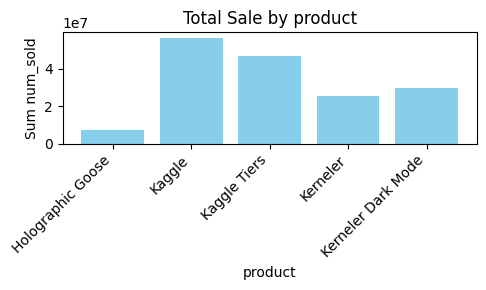

In [85]:
plot_bar(df_train, x_col='product', y_col='num_sold', title='Total Sale by product')

- This is unbalance, since the holographic goose is less

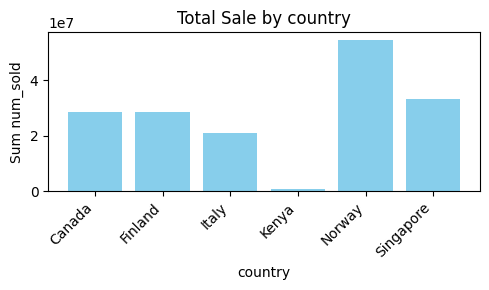

In [86]:
plot_bar(df_train, x_col='country', y_col='num_sold', title='Total Sale by country')

- Country sale is unbalance

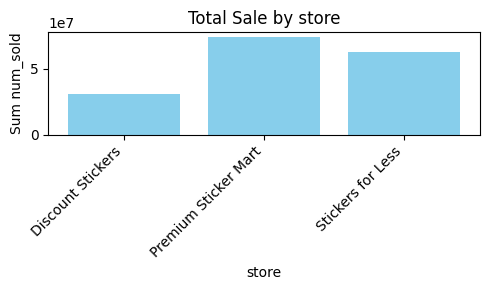

In [87]:
plot_bar(df_train, x_col='store', y_col='num_sold', title='Total Sale by store')

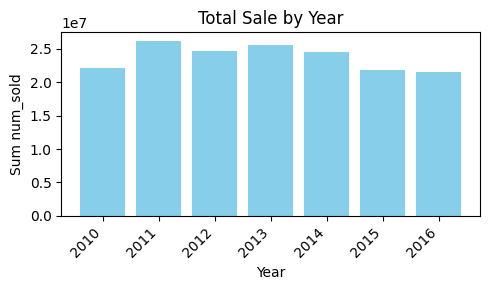

In [88]:
plot_bar(df_train, x_col='Year', y_col='num_sold', title='Total Sale by Year')

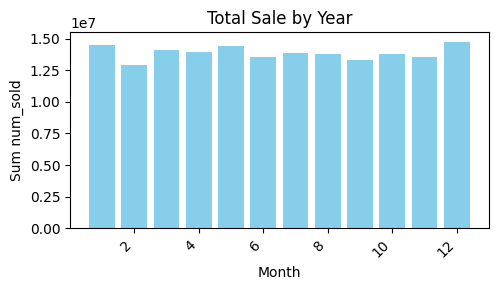

In [89]:
plot_bar(df_train, x_col='Month', y_col='num_sold', title='Total Sale by Month')

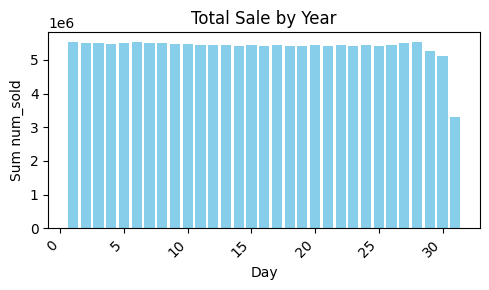

In [90]:
plot_bar(df_train, x_col='Day', y_col='num_sold', title='Total Sale by Day')

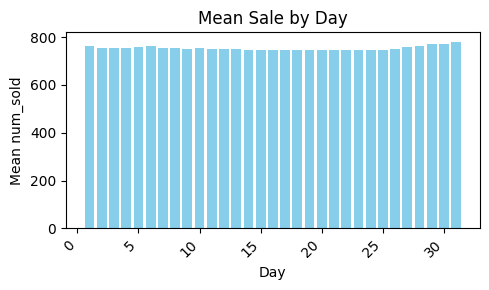

In [91]:
plot_bar(df_train, x_col='Day', y_col='num_sold', agg_func='mean', title='Mean Sale by Day')

## Missing value check

In [17]:
df_train.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [73]:
def calculate_na_portion(data, groupby_col, count_col='num_sold'):
    """
    Calculate the portion of missing values (NA) for each unique value in the specified column.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        groupby_col (str): The column to group by (e.g., 'product', 'store', etc.).
        count_col (str): The column to check for missing values (e.g., 'num_sold').

    Returns:
        pd.DataFrame: A DataFrame with the unique values of groupby_col and their NA portion (%).
    """

    total_count = data.groupby(groupby_col)[count_col].count()
    
    na_count = data[data[count_col].isna()].groupby([groupby_col]).size().reset_index(name='na_count')
    
    na_portion = pd.merge(total_count, na_count, how='inner', on=groupby_col)

    na_portion['na_portion'] = np.round(na_portion['na_count'] / na_portion[count_col]*100, 2)

    
    return na_portion


In [71]:
calculate_na_portion(df_train, groupby_col='product', count_col='num_sold')

,product,num_sold,na_count,na_portion
0,Holographic Goose,37220,8806,23.66
1,Kerneler,45962,64,0.14
2,Kerneler Dark Mode,46025,1,0.00


In [74]:
calculate_na_portion(df_train, groupby_col='store', count_col='num_sold')

,store,num_sold,na_count,na_portion
0,Discount Stickers,71531,5179,7.24
1,Premium Sticker Mart,75684,1026,1.36
2,Stickers for Less,74044,2666,3.60


In [75]:
calculate_na_portion(df_train, groupby_col='country', count_col='num_sold')

,country,num_sold,na_count,na_portion
0,Canada,34109,4246,12.45
1,Kenya,33730,4625,13.71


In [76]:
calculate_na_portion(df_train, groupby_col='date', count_col='num_sold')

,date,num_sold,na_count,na_portion
0,2010-01-01,88,2,2.27
1,2010-01-02,88,2,2.27
2,2010-01-03,88,2,2.27
3,2010-01-04,87,3,3.45
4,2010-01-05,87,3,3.45
...,...,...,...,...
2552,2016-12-27,88,2,2.27
2553,2016-12-28,88,2,2.27
2554,2016-12-29,88,2,2.27
2555,2016-12-30,88,2,2.27


- Need to develop the imputation strategies